In [74]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from operator import add
#import matplotlib.pyplot as plt
personinfo = pd.DataFrame(pd.read_csv((r"logs/all_together.csv")))
actionvalues = pd.DataFrame(pd.read_csv((r"action_values.csv")))
print(personinfo)

      Unnamed: 0  run_number  round_number  turn_number  \
0              0           0             0            0   
1              1           0             0            1   
2              2           0             0            2   
3              3           0             0            3   
4              4           0             0            4   
...          ...         ...           ...          ...   
3195        3195           9             9          315   
3196        3196           9             9          316   
3197        3197           9             9          317   
3198        3198           9             9          318   
3199        3199           9             9          319   

                     _action_name person_before_action_name  \
0             starts_conversation                     Robin   
1                stands_in_corner                   Patrick   
2                     leaves_room                    Ronnie   
3                stands_in_corner      

In [75]:
def set_up(personinfo):
    action_history = personinfo.loc[:,'_action_name']
    person_action_history = personinfo.loc[:,'person_before_action_name']
    personactionlist = []
    count = 0
    #df = df[((df['A'] > 0) & (df['B'] > 0)) | ((df['A'] < 0) & (df['B'] < 0))]
    for person in person_action_history:
        if count < 10:
            persondetails = pd.DataFrame(personinfo.loc[(personinfo['person_before_action_name'] == person) | (personinfo['person_after_action_conversation_partner'] == person)])
            #editeddetails = persondetails[['person_before_action_name', 'person_before_action_emotional_state', 'person_before_action_location_state']]
            persondetails.to_csv('personlogs/' + person + '_testing.csv')
            personactionlist.append(persondetails)
        count += 1
    
    return person_action_history
    
person_list = set_up(personinfo=personinfo)
    

In [76]:
def freq_dist(action_history):
    freq_dict = {}
    for action in action_history: #frequency distribution of person's actions
        if action in freq_dict:
            freq_dict[action] += 1
        else:
            freq_dict[action] = 1
    return freq_dict
    

In [77]:
def conv_mean(action_history):
    count = 0
    inConv = False
    convtot = []
    for action in action_history: #gets mean length of conversation
        if action == 'starts_conversation':
            count = 1
            inConv = True
        elif action == 'leaves_conversation':
            convtot.append(count)
            inConv = False
        elif inConv:
            count += 1
    avgconv = sum(convtot) / len(convtot)
    return avgconv


In [78]:
count = 0
for x in person_list:   #gets the difference between personality and mean action vector
    if count < 10:
        tot = [0,0,0,0,0]
        filepath = "personlogs/" + x + "_testing.csv"
        individualinfo = pd.DataFrame(pd.read_csv((filepath)))
        indiactioninfo = pd.DataFrame(individualinfo.loc[individualinfo['person_before_action_name'] == x])
        indi_action_history = indiactioninfo.loc[:,'_action_name']
        action_length = conv_mean(indi_action_history)                #finds the mean conversation length per person
        print("mean convo length for", x, " : ", str(action_length))
        freq_distribution = freq_dist(indi_action_history)             #finds the frequency distribution of actions per person
        print("freq distribution", freq_distribution)
        intcount = 0
        for action in indi_action_history:
            mapped_actions = pd.DataFrame(actionvalues.loc[actionvalues['action_name'] == action])
            #print(mapped_actions)
            #print('------------------------------------')
            for item in (mapped_actions.loc[:,'most_likely_personality_vector_OCEAN']):
                intlist = json.loads(item)
                tot = list(map(add, intlist, tot))
            
            intcount += 1
        print('TOTAL IS:', tot)
        avg_vector = []
        for item in tot:
            avg_vector.append(round(item/200,2))
        print("average: ", avg_vector)
        print(intcount)
        indi_action_history.to_csv('personlogstesting/' + x + '_testing.csv')
    count += 1
    #action_log = x[2]
    #personality = x[1]
    #mlv = action_log[:,2] 
    #action_avg = np.mean(mlv, axis = 0)   #averages most likely vector of each action
    #action_diff.append(np.subtract(personality - action_avg))
#print(action_diff)  
    

mean convo length for Robin  :  28.0
freq distribution {'starts_conversation': 5, 'leaves_room': 9, 'stands_in_corner': 7, 'yawns': 52, 'makes_deeptalk': 3, 'shares': 2, 'jokes': 5, 'gives_controversial_opinion': 3, 'brags': 3, 'makes_smalltalk': 2, 'changes_the_topic': 1, 'laughs': 2, 'leaves_conversation': 1, 'rants': 1, 'gives_an_insult': 1, 'supports': 2, 'shows_concern': 1}
TOTAL IS: [7, -4, 18, -10, -11]
average:  [0.04, -0.02, 0.09, -0.05, -0.06]
100
mean convo length for Patrick  :  6.666666666666667
freq distribution {'stands_in_corner': 8, 'leaves_room': 7, 'gives_controversial_opinion': 6, 'shows_interest': 1, 'supports': 4, 'makes_smalltalk': 5, 'rants': 2, 'changes_the_topic': 4, 'laughs': 4, 'starts_conversation': 8, 'brags': 8, 'shows_concern': 13, 'gives_an_insult': 12, 'jokes': 3, 'yawns': 7, 'shares': 2, 'shouts': 3, 'leaves_conversation': 3}
TOTAL IS: [8, -10, 30, -13, -2]
average:  [0.04, -0.05, 0.15, -0.07, -0.01]
100
mean convo length for Ronnie  :  8.25
freq dist

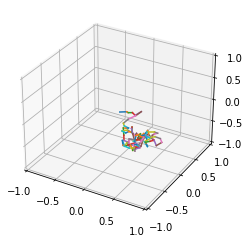

In [79]:
signs = [-1, 1]
magnitudes = [mag / 100 for mag in range(1,10)]

num_dimensions = 3
num_change_vectors = 100

example_vectors = np.array([[np.random.choice(magnitudes) * np.random.choice(signs) for _ in range(num_dimensions)] for _ in range(num_change_vectors)])

# Obsolete matplotlib method (second method is better)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(-1, 1)
ax.axes.set_ylim3d(-1, 1)
ax.axes.set_zlim3d(-1, 1)

prev_pos = np.array([0,0,0])
#Plot the change vectors
for example_vector in example_vectors:
    x1,y1,z1 = prev_pos
    new_pos = prev_pos + example_vector
    x2,y2,z2 = new_pos
    ax.plot((x1,x2),(y1,y2),(z1,z2))
    prev_pos = new_pos

In [80]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

rs = np.random.RandomState()
rs.seed(0)

In [81]:
def plot_3D_positions(positions):
    x, y, z = positions
    index = np.array([x for x in range(10)])

    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        marker=dict(
            size=4,
            colorscale='Viridis',
        ),
        line=dict(
            color=index,
            width=2
        ))])

    fig.update_layout(
        width=800,
        height=700,
        autosize=False,
        scene=dict(
            xaxis = dict(nticks=4, range=[-1,1],),
            yaxis = dict(nticks=4, range=[-1,1],),
            zaxis = dict(nticks=4, range=[-1,1],),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=0,
                    y=1.0707,
                    z=1,
                )
            ),
            aspectratio = dict( x=1, y=1, z=0.7 ),
            aspectmode = 'manual'
        ),
    )

    return fig
individualinfo = pd.DataFrame(pd.read_csv('personlogs/Agnes_testing.csv'))
indiactioninfo = pd.DataFrame(individualinfo.loc[individualinfo['person_before_action_name'] == 'Agnes'])
indi_action_history = indiactioninfo.loc[:,'person_after_action_emotional_state']
list1 = []
list2 = []
list3 = []
for item in indi_action_history:
    item = item[0] +item[2:]
    updated_item = item.replace(" ", ",")
    print(updated_item)
    #final_item = json.loads(updated_item)
    #print(final_item)
#print(list1)
dummy_positions = np.vstack([[x for x in np.linspace(-1,1, 10)] for _ in range(3)])
print(dummy_positions)
plot_3D_positions(dummy_positions)

[0.31549554,-0.05414953,-0.32528712]
[0.31549554, -0.05414953, -0.32528712]
[0.31849554,-0.05414953,-0.32548712]
[0.31849554, -0.05414953, -0.32548712]
[0.33049554,-0.02314953,-0.29448712]
[0.33049554, -0.02314953, -0.29448712]
[0.33349554,-0.02414953,-0.29448712]
[0.33349554, -0.02414953, -0.29448712]
[0.33849554,,0.01085047,-0.26648712]


JSONDecodeError: Expecting value: line 1 column 13 (char 12)